In [1]:
import igraph as ig 
import louvain

In [2]:
import collections
import networkx as nx
nx.__version__

'2.2'

## Airport DataSet

In [50]:
G = ig.Graph.Read_Ncol('UKAirportIntNodes.txt', directed=True, names=True)

In [56]:
communities = louvain.find_partition(G, louvain.ModularityVertexPartition)

In [52]:
print communities

Clustering with 46 elements and 5 clusters
[0] 1, 2, 4, 5, 6, 11, 17, 24, 26, 32, 33, 34, 35, 37, 43
[1] 3, 7, 9, 10, 13, 19, 28, 29, 30, 36, 39
[2] 12, 14, 15, 16, 20, 38, 42, 44, 45, 46
[3] 18, 21, 22, 23, 25, 27
[4] 8, 31, 40, 41


In [53]:
fh = open("UKAirportIntNodes.txt", 'rb')
G_nx = nx.read_weighted_edgelist("UKAirportIntNodes.txt", create_using=nx.DiGraph(), nodetype=int)
print(nx.info(G_nx))

Name: 
Type: DiGraph
Number of nodes: 46
Number of edges: 238
Average in degree:   5.1739
Average out degree:   5.1739


In [57]:
import numpy as np
import pandas as pd
#Inputs are cummunities & G (iGraph) & G_nx (NetworkX)

# Embeddedness score algorithm for directed networks
df = pd.DataFrame(columns=['embeddedness'])
distribution = np.array([])
for cluster in range(len(communities)):
    #translate to original names
    communityNames = np.array([])
    for node in communities[cluster]:
        communityNames = np.append(communityNames, int(G.vs[node]['name']))
    for node in communityNames:
        kInt = 0
        for neighbor in G_nx.successors(node):
            if float(neighbor) in communityNames:
                kInt += 1
        outdeg = G_nx.out_degree(node)
        if outdeg != 0:
            embeddedness = float("{0:.2f}".format(float(kInt)/outdeg)) # 2f
            distribution = np.append(distribution, embeddedness)
            df = df.append({'embeddedness' : embeddedness} , ignore_index=True)

In [58]:
#print(distribution)
print np.average(distribution)

0.5559459459459459


In [48]:
print(distribution)
print np.average(distribution)

[0.46 0.47 0.58 0.45 0.69 0.53 0.75 0.47 0.5  0.42 0.73 0.39 0.71 0.57
 0.62 0.64 0.73 0.82 0.5  0.54 0.49 0.71 0.69 0.59 0.57 0.68 0.58 0.72
 0.67 0.63 0.77 0.69 0.84 0.62 0.68 0.73 0.72 0.78 0.42 0.67 0.52 0.56
 0.55 0.55 0.73 0.5  0.74 0.76 0.46 0.59 0.74 0.49 0.75 0.78 0.5  0.73
 0.73 0.73 0.6  0.55 0.61 0.41 0.74 0.48 0.56 0.68 0.68 0.62 0.65 0.45
 0.73 0.61 0.53 0.55 0.42 0.63 0.88 0.75 0.56 0.51 0.49 0.55 0.42 0.78
 0.67 0.73 0.67 0.46 0.57 0.55 0.61 0.63 0.77 0.68 0.68 0.55 0.51 0.76
 0.61 0.67 0.64 0.53 0.81 0.63 0.54 0.54 0.59 0.73 0.83 0.78 0.48 0.74
 0.77 0.88 0.8  0.79 0.58 0.75 0.69 0.6  0.71 0.74 0.56 0.76 0.78 0.83
 0.88 0.73 0.88 0.81 0.9  0.65 0.77 0.82 0.85 0.9  0.84 0.72 0.73 0.82
 0.85 0.76 0.88 0.8  0.88 0.86 0.76 0.64 0.91 0.81 0.82 0.68 0.78 0.82
 0.89 0.84 0.86 0.6  0.78 0.66 0.72 0.83 0.82 0.82 0.87 0.76 0.88 0.92
 0.81 0.66 0.84 0.93 0.73 0.75 0.81 0.89 0.66 0.85 0.75 0.78 0.8  0.87
 0.57 0.8  0.7  0.83 0.78 0.84 0.64 0.83 0.75 0.87 0.89 0.73 0.74 0.83
 0.92 

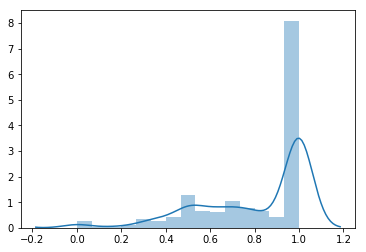

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(distribution);

Text(0,0.5,'Frequency')

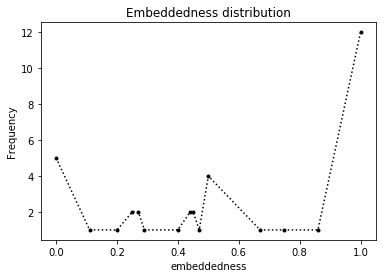

In [59]:
dftotal = df.groupby(['embeddedness']).size()
ax = dftotal.plot(style='k.:',title='Embeddedness distribution')
ax.set_ylabel('Frequency')

Text(0,0.5,'Frequency')

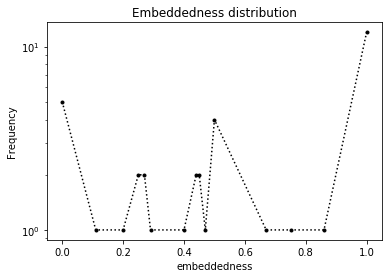

In [60]:
ax = dftotal.plot(style='k.:',title='Embeddedness distribution', logy=True)
ax.set_ylabel('Frequency')